## Trabalho 2: SVD e solução obtida pelo uso da pseudoinversa generalizada ($G^{\phi}$) para regressão polinomial ajustada a 3 conjuntos de dados
### Disciplina: Problemas Inversos II
### Professor: Raphael Vieira Menezes de Souza
### Aluno: Matheus Klatt


1) Importando os módulos que contém as funções necessárias a realização do trabalho

In [1]:
#1)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics, linear_model, preprocessing
import seaborn as sns
%matplotlib inline

2) Leitura do arquivo "dados1.txt", o qual contém os dados das abscissas ($x^1$) e das três formas da variável ordenada ($d$, $d + \Delta$ e $d + \Delta$ + outliers)

In [2]:
#2)
# Usando a função pandas.read_csv para ler o arquivo com os dados, "dados1.csv".
# O arquivo foi previamente convertido para o formato .csv.
trab1_df=pd.read_csv("dados1.txt",header=None,sep=" ",names=[r"$x^1$","d","d_delta","d_delta_outliers"])

3) Criando as variáveis correspondentes as diferentes ordens polinomiais, $x^0$, $x^2$, $x^3$, $x^4$, $x^5$ a partir da variável $x^1$ lida do arquivo.

In [3]:
#3)
# Organizando as colunas do dataframe criado, especificamente criando as demais colunas da variável preditora X.
# As variáveis em X são apenas polinômios de diferentes ordens [n = 0 : 5].
# O polinômio de ordem 1, x1 foi lido do arquivo, os outros graus polinomiais são criados a partir dele.

trab1_df[r"$x^0$"]=trab1_df[r"$x^1$"]*0 + 1.0
trab1_df[r"$x^2$"]=trab1_df[r"$x^1$"]**2
trab1_df[r"$x^3$"]=trab1_df[r"$x^1$"]**3
trab1_df[r"$x^4$"]=trab1_df[r"$x^1$"]**4
trab1_df[r"$x^5$"]=trab1_df[r"$x^1$"]**5

4) Reordenando as colunas do dataframe que contém todas as variáveis do problema para uma visualização mais conveniente

In [4]:
#4)
# Organizando as colunas de cada variável no dataframe completo, 6 variáveis preditoras, e 3 variáveis preditas
trab1_df=trab1_df[[r"$x^0$",r"$x^1$",r"$x^2$",r"$x^3$",r"$x^4$",r"$x^5$","d","d_delta","d_delta_outliers"]]

5) Visualizando o dataframe que contém os dados, e verificando que foram lidos, criados e agrupados corretamente

In [5]:
#5)
# Vericando que os dados foram lidos e criados corretamente
trab1_df

,$x^0$,$x^1$,$x^2$,$x^3$,$x^4$,$x^5$,d,d_delta,d_delta_outliers
0,1.0,0.0,0.00,0.000,0.0000,0.00000,1.0000,1.9400,1.9400
1,1.0,0.1,0.01,0.001,0.0001,0.00001,1.0500,1.6700,1.6700
2,1.0,0.2,0.04,0.008,0.0016,0.00032,1.1603,0.3803,0.3803
3,1.0,0.3,0.09,0.027,0.0081,0.00243,1.3311,2.1711,2.1711
4,1.0,0.4,0.16,0.064,0.0256,0.01024,1.5626,1.6026,1.6026
...,...,...,...,...,...,...,...,...,...
95,1.0,9.5,90.25,857.375,8145.0625,77378.09375,307.9450,308.2350,308.2350
96,1.0,9.6,92.16,884.736,8493.4656,81537.26976,314.7894,314.3294,300.0000
97,1.0,9.7,94.09,912.673,8852.9281,85873.40257,321.7169,321.0069,321.0069
98,1.0,9.8,96.04,941.192,9223.6816,90392.07968,328.7277,327.8577,327.8577


6) Montagem do problema na forma matricial: $\mathbf{d} = \mathbf{G}\mathbf{m}$. Nesta forma o vetor $\mathbf{d}$ guarda a variável ordenada/predita dependente, a matriz $\mathbf{G}$ contém as variáveis independentes/preditores e o vetor $\mathbf{m}$ corresponde aos coeficientes/parametros que se deseja obter pela solução do problema inverso.

$\begin{equation}
\mathbf{d}_{100 x 1} = \mathbf{G}_{100 x 6} \cdot \mathbf{m}_{6 x 1} = 
\begin{bmatrix}
1.0\\
\vdots\\
335.8220
\end{bmatrix}
=
\begin{bmatrix}
1.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0\\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
1.0 & 9.9 & 98.01 & 970.299 & 9605.9601 & 95099.00499\\
\end{bmatrix}
\cdot
\begin{bmatrix}
m_{0}\\
\vdots\\
m_{6}\\
\end{bmatrix}
\end{equation}$


In [6]:
#6)
# Montando o sistema na forma d = G m
G=trab1_df[[r"$x^0$",r"$x^1$",r"$x^2$",r"$x^3$",r"$x^4$",r"$x^5$"]].to_numpy()
d=trab1_df["d"].to_numpy().reshape((-1,1))
d_delta=trab1_df["d_delta"].to_numpy().reshape((-1,1))
d_delta_outliers=trab1_df["d_delta_outliers"].to_numpy().reshape((-1,1))
d_all=np.hstack((d,d_delta,d_delta_outliers))
# Exibindo formato das matrizes criadas para garantir que as dimensões estão corretas
print("Shape G: ",G.shape,"Shape d: ",d.shape,"Shape d_delta: ",d_delta.shape,
      "Shape d_delta_outliers: ",d_delta_outliers.shape, "Shape d_all: ",d_all.shape)

Shape G:  (100, 6) Shape d:  (100, 1) Shape d_delta:  (100, 1) Shape d_delta_outliers:  (100, 1) Shape d_all:  (100, 3)


7) O fato das colunas da matriz  serem $\textbf{linearmente independentes}$ permite que $\mathbf{G}$ tenha inversa e consequentemente uma solução pode ser obtida pela aplicação das equações normais:

$\begin{equation}
\mathbf{m} = (\mathbf{G}^{T}\mathbf{G})^{-1}\mathbf{G}^T\mathbf{d}
\end{equation}$

A álgebra matricial permite resolver este sistema uma única vez para os 3 conjuntos de dados diferentes, $\mathbf{d}$, $\mathbf{d} + \Delta$ e $\mathbf{d} + \Delta$ + $outliers$, agrupando-os como colunas de uma única matriz $\mathbf{D}$. Neste caso serão obtidos os parâmetros referentes aos três diferentes modelos em cada uma das colunas da matriz $\mathbf{M}$. A expressão para as equações normais toma então a seguinte forma

$\begin{equation}
\mathbf{M}_{6 x 3} = (\mathbf{G}^{T}_{6 x 100}\mathbf{G}_{100 x 6})^{-1}\mathbf{G}^T_{6 x 100}\mathbf{D}_{100 x 3}
\end{equation}$

In [7]:
#7)
# Resolvendo o sistema na forma m = (G.T G)-1 G.T d, (norma L2)
# Primeiro calculando a inversa de G.T G
inv_G=np.linalg.inv(np.matmul(G.T,G))
# Calculando G.T d
GTd=np.matmul(G.T,d_all)
# multiplicando (G.T G)-1 e G.T d para obter m
m=np.matmul(inv_G,GTd)
#colocando m na forma de vetor coluna
m=m.reshape((len(m),3))

8) Uma das maneiras de se resolver sistemas lineares deficientes de posto é utilizando a decomposição em valores singulares ($\textit{singular value decomposition}$), ou SVD. A SVD fatora a matriz $\mathbf{G}$ em:

$\begin{equation}
\mathbf{G} = \mathbf{U}\mathbf{S}\mathbf{V}^T
\end{equation}$

Onde $\mathbf{U}$ é uma matriz $\textit{m}$ x $\textit{m}$ ortogonal na qual as colunas são vetores unitários de base que compreendem o espaço de dados, $\mathit{{R^{m}}}$. $\mathbf{V}$ é uma matriz $\textit{n}$ x $\textit{n}$ ortogonal na qual as colunas são vetores unitários de base que compreendem o espaço do modelo, $\mathit{{R^n}}$. $\mathbf{S}$ é uma matriz $\textit{m}$ x $\textit{n}$ diagonal com elementos diagonais chamados valores singulares. 

É possível escrever a SVD em forma reduzida com as matrizes $\mathbf{U}_{p}$, $\textit{m}$ x $\textit{p}$, $\mathbf{V}_{p}$, $\textit{n}$ x $\textit{p}$, e $\mathbf{S}_{p}$, $\textit{p}$ x $\textit{p}$,onde $\textit{p}$ corresponde aos valores singulares não nulos de $\mathbf{G}$. Desta forma a decomposição em sua forma compacta é expressa como:

$\begin{equation}
\mathbf{G} = \mathbf{U}_{p}\mathbf{S}_{p}{\mathbf{V}_{p}}^T
\end{equation}$

In [8]:
#8) Realizando decomposicao em valores singulares de G em USV, G=U*S*(V.T), onde S e o vetor que guarda os valores 
# singulares de interesse para o trabalho
# referencia para uso da função numpy.linalg.svd : 
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html

U,S,V_t=np.linalg.svd(G)

# Verificando que G = U*S*V_t
p_S=np.eye(len(S))*S
G_r=np.matmul(np.matmul(U[:,:len(S)],p_S),V_t)
print("G = U*S*V.T, ",np.allclose(np.matmul(np.matmul(U[:,:len(S)],p_S),V_t),G))

G = U*S*V.T,  True


9) Os valores da matriz diagonal $\mathbf{S}$ são tipicamente organizados em ordem decrescente

[2.95054230e+05 3.34216585e+03 1.10948782e+02 1.01389511e+01
 2.97678138e+00 6.97917294e-01]


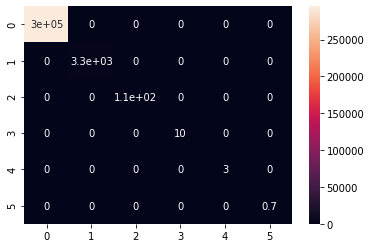

In [9]:
#9) Visualizando a matriz diagonal S que guarda os valores singulares de G
sns.heatmap(p_S,annot=True)
# Imprimindo os valores singulares guardados em S
print(S)

10) Um dos benefícios de se representar $\mathbf{G}$ por sua SVD é o fato da matriz inversa da forma fatorada $\mathbf{U}\mathbf{S}\mathbf{V}^T$ sempre existir. Esta matriz é chamada de inversa generalizada de $\mathbf{G}$, ou pseudoinversa de $\textit{Moore-Penrose}$. A pseudouinversa $\mathbf{G}^{\phi}$ pode ser escrita como:

$\begin{equation}
\mathbf{G}^{\phi} = \mathbf{V}_{p}{\mathbf{S}_{p}}^{-1}{\mathbf{U}_{p}}^T
\end{equation}$

$\mathbf{G}^{\phi}$ pode ser usada para se obter uma solução $\mathbf{m}^{\phi}$ fazendo-se simplesmente:

$\begin{equation}
\mathbf{m}^{\phi} = \mathbf{G}^{\phi}\mathbf{d}
\end{equation}$

Pode-se mostrar ainda que a solução $\mathbf{m}^{\phi}$ é equivalente a solução de mínimos quadrados, i.e., a obtida pelo uso das equações normais/minimização da norma L2 como feito em #7.

In [10]:
#10) Calculo da pseudo inversa de G. A funcao numpy.linalg.pinv computa a pseudoinversa utilizando as matrizes U,S,V.T
# obtidas da SVD de G. A funcao recebe como argumentos a matriz para qual se deseja calcular a pseudoinversa, 
# no caso G, e um numero de condicao 'rcond', o qual determina 
# o limite abaixo do qual os valores singulares de S sao truncados.
# O valor padrao desse argumento eh 'S.max()*1e-15', ou seja,praticamente 0.0, 
# o que significa que nao ha truncamento.
# Para ter maior controle sobre os termos de S a serem truncados basta tomar rcond = (1/S.max())*S[i],
# onde i corresponde ao valor singular a partir do qual desejamos fazer o truncamento, e.g.,
# no trabalho G possui 6 valores singulares, portanto,
# rcond = (1/S.max())*S[4], corresponde ao truncamento dos dois menores valores de S. 
#Para obter a pseudoinversa sem truncar nenhum dos valores singulares basta tomar rcond=(1/np.max(S))*0.0.
G_pinv=np.linalg.pinv(G,rcond=((1/np.max(S))*0.0))
G_pinv_trunc=np.linalg.pinv(G,rcond=((1/np.max(S))*S[-1]))

# Calculando a solucao, m° utilizando a pseudo inversa de G, G°. m° = G°*d 
m_pinv=np.matmul(G_pinv,d_all)
m_pinv_trunc=np.matmul(G_pinv_trunc,d_all)

In [35]:
#11) Visualizando a solucao obtida pela pseudoinversa 

print("Solução obtida pelo uso da pseudoinversa de G: \n", m_pinv,"\n")
# Repare que a solucao eh a mesma que a obtida pelas equacoes normais
print("Diferença absoluta entre solução obtida pelas equações normais e solução pela pseudoinversa: \n", 
      np.round(abs(m-m_pinv),3),"\n")

Solução obtida pelo uso da pseudoinversa de G: 
 [[ 9.99989989e-01  1.67161923e+00  3.26895640e+00]
 [ 2.00020855e-01 -1.38503247e+00 -7.55755215e+00]
 [ 2.99998706e+00  3.95127071e+00  9.65135461e+00]
 [ 4.00033269e-02 -1.82394686e-01 -2.06532350e+00]
 [-3.74502717e-07  2.24606681e-02  2.71486093e-01]
 [ 1.52740395e-08 -8.23143358e-04 -1.21499810e-02]] 

Diferença absoluta entre solução obtida pelas equações normais e solução pela pseudoinversa: 
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 



In [37]:
#12) Visualizando a solucao obtida pela pseudoinversa com truncamento do menor valor singular de G 
print("Solução obtida pelo uso da pseudoinversa de G com menor valor singular truncado: \n", m_pinv_trunc,"\n")
# Neste caso a soluçao pela pseudoinversa e pelas equações normais não são equivalentes
print("Diferença absoluta entre solução obtida pelas equações normais e solução pela pseudoinversa: \n", 
      np.round(abs(m-m_pinv_trunc),3),"\n")

Solução obtida pelo uso da pseudoinversa de G com menor valor singular truncado: 
 [[ 4.62944974e-01  4.85383399e-01 -6.98099983e-01]
 [ 1.50628266e+00  1.50026488e+00  2.09157236e+00]
 [ 2.19571365e+00  2.17477544e+00  3.71032946e+00]
 [ 2.36667541e-01  2.52001187e-01 -6.12599796e-01]
 [-2.07899993e-02 -2.34598734e-02  1.17916818e-01]
 [ 7.93777681e-04  9.30135015e-04 -6.28659871e-03]] 

Diferença absoluta entre solução obtida pelas equações normais e solução pela pseudoinversa: 
 [[5.370e-01 1.186e+00 3.967e+00]
 [1.306e+00 2.885e+00 9.649e+00]
 [8.040e-01 1.776e+00 5.941e+00]
 [1.970e-01 4.340e-01 1.453e+00]
 [2.100e-02 4.600e-02 1.540e-01]
 [1.000e-03 2.000e-03 6.000e-03]] 



13) É possível avaliar o nível de $\textit{bias}$ na solução obtida pela pseudoinversa $\mathbf{G}^{\phi}$ pela construção da matriz de resolução do modelo $\mathbf{R}_{m}$. A matriz $\mathbf{R}_{m}$ caracteriza a relação linear entre a solução $\mathbf{m}^{\phi}$, e o modelo real $\mathbf{m}_{real}$. O traço de $\mathbf{R}_{m}$, fornece uma primeira medida quantitativa da resolução, de maneira geral quanto mais próximo de $\textit{n}$ for $Tr(\mathbf{R}_{m})$, mais próximo $\mathbf{R}_{m}$ é da matriz identidade e maior a resolução do modelo $\mathbf{m}^{\phi}$.

Na prática $\mathbf{R}_{m}$ é utilizada examinando os elementos da diagonal principal. Elementos da diagonal principal com valor próximo a 1 correspondem a parâmetros do modelo que foram bem resolvidos, enquanto valores pequenos correspondem a parâmetros que não foram bem resolvidos pelo modelo obtido através do uso da pseudoinversa $\mathbf{G}^{\phi}$.



Numero de variaveis : 6
Traco de R_m:  6.000000000000652


<AxesSubplot:>

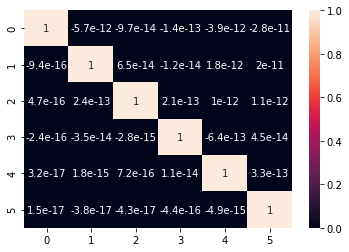

In [13]:
#13) A matriz de resolucao do modelo pode ser calculada pela expressao R_m = G°*G. A matriz eh um indicativo de quao
# proximo o modelo obtido pela pseudo inversa esta do modelo real, quanto mais proximo R_m estiver da matriz identidade, I, 
# maior eh a resolucao do modelo obtido pela pseudoinversa, e quando R_m = I, diz-se que a resolucao e perfeita.
resolution_m_pinv=np.matmul(G_pinv,G)

# Outra maneira de quantificar a qualidade do modelo m° obtido e calculando o traco da matriz R_m, Tr(R_m),
# quanto mais proximo Tr(R_m) for de n (numero de variaveis do problema, no caso, 6)
print("Numero de variaveis :",len(G[0,:]))
print("Traco de R_m: ", np.trace(resolution_m_pinv))
sns.heatmap(resolution_m_pinv,annot=True)



14) Quando se analisa a qualidade da solução $\mathbf{m}^{\phi}$ é útil avaliar também a distribuição das magnitudes dos valores singulares de $\mathbf{S}_{p}$. A manutenção de valores singulares pequenos no cálculo da solução pela pseudoinversa generalizada pode tornar $\mathbf{m}^{\phi}$ sensível a presença de ruído nos dados.

Uma das maneiras de reduzir a sensibilidade da solução a presença de ruídos é através do truncamento dos valores singulares com valor relativamente baixo. Para isso, basta zerar os valores singulares $s_{i}$, onde $i = [1,p]$ que satisfaçam o critério:

$\begin{equation}
s_{i} = 0.0 \text{ , para } i \gt k \text{ , onde } k = [1,p]
\end{equation}$

, e.g., se $p = 6$, para $k = 5$, faz-se $s_{6} = 0.0$, já que $i = 6 \gt 5 = k$. Neste caso diz-se então que a série de valores singulares de $\mathbf{S}_{p}$ foi truncada no último valor.

Nota: Uma matriz $\mathbf{S}$, $\textit{m}$ x $\textit{n}$, guarda todos os valores singulares em sua diagonal principal. Como a matriz contém apenas $min(m,n)$ elementos em sua diagonal principal, existem então $min(m,n)$ valores singulares. Neste trabalho $m = 100 \gt n = p = 6$, o que ocasiona que $\mathbf{S}$ e sua forma compacta $\mathbf{S}_{p}$ tenham o mesmo número de valores singulares, $p = 6$.

Numero de variaveis : 6
Traco de R_m:  4.999999999998884


<AxesSubplot:>

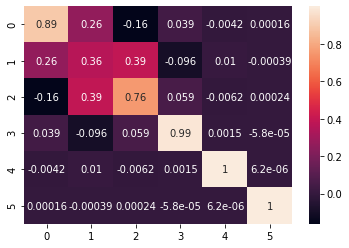

In [14]:
#14) A matriz de resolucao do modelo pode ser calculada pela expressao R_m = G°*G. A matriz eh um indicativo de quao
# proximo o modelo obtido pela pseudo inversa esta do modelo real, quanto mais proximo R_m estiver da matriz identidade, I, 
# maior eh a resolucao do modelo obtido pela pseudoinversa, e quando R_m = I, diz-se que a resolucao e perfeita.
resolution_m_pinv_trunc=np.matmul(G_pinv_trunc,G)

# Outra maneira de quantificar a qualidade do modelo m° obtido e calculando o traco da matriz R_m, Tr(R_m),
# quanto mais proximo Tr(R_m) for de n (numero de variaveis do problema, no caso, 6)
print("Numero de variaveis :",len(G[0,:]))
print("Traco de R_m: ", np.trace(resolution_m_pinv_trunc))
sns.heatmap(resolution_m_pinv_trunc,annot=True)



In [15]:
m_pinv_trunc

array([[ 4.62944974e-01,  4.85383399e-01, -6.98099983e-01],
       [ 1.50628266e+00,  1.50026488e+00,  2.09157236e+00],
       [ 2.19571365e+00,  2.17477544e+00,  3.71032946e+00],
       [ 2.36667541e-01,  2.52001187e-01, -6.12599796e-01],
       [-2.07899993e-02, -2.34598734e-02,  1.17916818e-01],
       [ 7.93777681e-04,  9.30135015e-04, -6.28659871e-03]])

15) Se possível, uma das formas de se quantificar a qualidade da solução $\mathbf{m}^{\phi}$ é comparando-a com o modelo real $\mathbf{m}_{real}$ caso ele seja conhecido.

Para este trabalho sabe-se que os dados foram gerados utilizando o polinômio:

$\begin{equation}
p(x) = 1 + 0.2x + 3x^2 + 0.04x^3
\end{equation}$.

Portanto, $\mathbf{m}_{real}$ pode ser escrito como:

$\begin{equation}
\mathbf{m}_{real}
=
{\begin{bmatrix}
1.0\\
0.2\\
3.0\\
0.04\\
0.0\\
0.0\\
\end{bmatrix}}_{6 x 1}
\end{equation}$.

E um erro absoluto da solução $\mathbf{m}^{\phi}$ pode ser calculado fazendo

$\begin{equation}
\epsilon = \lvert\mathbf{m}^{\phi} - \mathbf{m}_{real}\rvert
\end{equation}$.

Nota: neste trabalho os modelos obtidos para os diferentes conjuntos de dados $d$, $d + \Delta$ e $d + \Delta$ + outliers, detalhados em  $\textbf{2)}$, foram agrupados em uma única matriz $\mathbf{M}^{\phi}$, na qual cada uma das três colunas corresponde respectivamente a cada um dos conjuntos de dados previamente citados.

In [16]:
#15) Calculando diferença absoluta entre parâmetros do modelo real e modelo obtido pelo uso da pseudoinversa de G:
m_real=np.array([[1,0.2,3.,0.04,0.,0.],[1,0.2,3.,0.04,0.,0.],[1,0.2,3.,0.04,0.,0.]]).T
print("Modelo real: \n",m_real,"\n")

# Basta entao calcular a diferenca absoluta entre cada um dos modelos obtidos, m (pelas equacoes normais)
# e m° (pela pseudo inversa de G, G°),e o modelo real m_real
print("|m-m_real|: \n",abs(np.round(m-m_real,2)),"\n")
print("|m°-m_real|: \n",abs(np.round(m_pinv-m_real,2)),"\n")

Modelo real: 
 [[1.   1.   1.  ]
 [0.2  0.2  0.2 ]
 [3.   3.   3.  ]
 [0.04 0.04 0.04]
 [0.   0.   0.  ]
 [0.   0.   0.  ]] 

|m-m_real|: 
 [[0.   0.67 2.27]
 [0.   1.59 7.76]
 [0.   0.95 6.65]
 [0.   0.22 2.11]
 [0.   0.02 0.27]
 [0.   0.   0.01]] 

|m°-m_real|: 
 [[0.   0.67 2.27]
 [0.   1.59 7.76]
 [0.   0.95 6.65]
 [0.   0.22 2.11]
 [0.   0.02 0.27]
 [0.   0.   0.01]] 



In [17]:
#16) Calculando diferença absoluta entre parâmetros do modelo real e modelo obtido pelo uso da pseudoinversa de G
# com último valor singular truncado:

m_real=np.array([[1,0.2,3.,0.04,0.,0.],[1,0.2,3.,0.04,0.,0.],[1,0.2,3.,0.04,0.,0.]]).T
print("Modelo real: \n",m_real,"\n")

# Basta entao calcular a diferenca absoluta entre cada um dos modelos obtidos, m (pelas equacoes normais)
# e m° (pela pseudo inversa de G, G°),e o modelo real m_real
print("|m-m_real|: \n",abs(np.round(m-m_real,2)),"\n")
print("|m°_truncado-m_real|: \n",abs(np.round(m_pinv_trunc-m_real,2)),"\n")

Modelo real: 
 [[1.   1.   1.  ]
 [0.2  0.2  0.2 ]
 [3.   3.   3.  ]
 [0.04 0.04 0.04]
 [0.   0.   0.  ]
 [0.   0.   0.  ]] 

|m-m_real|: 
 [[0.   0.67 2.27]
 [0.   1.59 7.76]
 [0.   0.95 6.65]
 [0.   0.22 2.11]
 [0.   0.02 0.27]
 [0.   0.   0.01]] 

|m°_truncado-m_real|: 
 [[0.54 0.51 1.7 ]
 [1.31 1.3  1.89]
 [0.8  0.83 0.71]
 [0.2  0.21 0.65]
 [0.02 0.02 0.12]
 [0.   0.   0.01]] 



17) Similarmente a abordagem do trabalho 1, pode-se usar os modelos obtidos por $\mathbf{G}^{\phi}$, e $\mathbf{G}^{\phi}$ truncada como modelo inicial para o algoritmo iterativo $\textit{IRLS}$ para a encontrar uma solução que minimiza a norma L1.

In [18]:
#17) Função que recebe os elementos G, d, um modelo inicial m, 
# e calcula a solução pela minimização da norma L1 utilizando o algoritmo IRLS.
# A função também aceita como argumentos opcionais o número máximo de iterações a serem realizadas (max_iterations),
# e o critério de tolerância a ser atingido para que o se considere a convergência do método (tol).
def L1Solution(G,d_all,m,max_iterations=1000,tol=0.001):

    m_L1_all=np.zeros((len(m),len(m[0,:])))
    m_=np.copy(m)

    for j in range (0,len(m[0,:])):
        # Definição dos critérios de parada do algoritmo, tolerância (tol) e número máximo de iterações (max_iterations)
        mk=m_[:,j].reshape((-1,1))
        d_=d_all[:,j].reshape((-1,1))
        current_iteration=0
        # Tolerância inicial que garante que o laço seja executado ao menos uma vez
        t=999.999

        # Calculo do vetor de residuo inicial (r0) utilizando o modelo inicial m0, solução da norma L2
        r0=d_-np.matmul(G,mk)
        # Criação da matriz diagonal R0
        R_0=np.eye(len(r0[:,0]))*1/r0
        # Atribuição do modelo inicial, m0, a variável (mk) que será iterativamente atualizada no laço

        # Atribuição do da matriz de pesos inicial, R0, a variável (R) que será iterativamente atualizada no laço
        R=R_0

        # Laço de resolução iterativa de: G.T R G (mk) = G.T R d
        while (t >= tol):
            # Contador de iterações
            current_iteration=current_iteration+1
            # Verifica se número máximo de iterações foi atingido
            if (current_iteration == max_iterations):
                print("Reached max number of iterations: {}".format(max_iterations))
                break

            #Início da resolução de G.T R G (mk) = G.T R d:
            # Lado esquerdo da igualdade
            # Calculo de G.T R
            GT_R_arr=np.matmul(G.T,R)
            # Calculo de G.T R G
            GT_R_G_arr=np.matmul(GT_R_arr,G) 

            # Lado direito da igualdade
            # Calculo de G.T R d
            GT_R_d_arr=np.matmul(GT_R_arr,d_)
            # passando G.T R G para o lado direito da igualdade, tal que: (mk) = (G.T R G)-1 G.T R d
            # Calculo de (G.T R G)-1
            GT_R_G_inv_arr=np.linalg.inv(GT_R_G_arr)
            # Calculo de (mk) = (G.T R G)-1 G.T R d
            mkp1=np.matmul(GT_R_G_inv_arr,GT_R_d_arr)

            # Atualização do critério de tolerância para a iteração atual (regra definida na pg. 47)
            t = np.sqrt(np.sum((mkp1-mk)**2))/(1+np.sqrt(np.sum((mkp1)**2)))
            # Atualização do melhor modelo obtido para o modelo (mk) obtido na iteração atual
            mk=mkp1
            # Calculo do novo vetor de residuos obtido agora com o modelo mk
            rk=abs(d_-np.matmul(G,mk))
            # Truncamento dos residuous muito pequenos, os quais podem causar instabilidade no algoritmo (pg. 47)
            rk[rk<1e-5]=1e-5
            # Criação da nova matriz de pesos R, utilizando o novo vetor de resíduos rk
            R=np.eye(len(rk[:,0]))*rk

            # Verficação se o critério de tolerância foi alcançado para definir se o algoritmo deve continuar
            if (t <= tol):
                print("Reached tolerance: {} <= {}".format(t,tol))
        mk=mk.reshape((len(mk))) 
        m_L1_all[:,j]=mk
    # Após término do laço coloca o melhor modelo obtido (mk) no formato de vetor coluna        


    return(m_L1_all)

In [19]:
#18) Cálculo da solução pela minimização da norma L1 utilizando o algoritmo IRLS
# com o modelo resultante da pseudoinversa de G
ml11_pinv=L1Solution(G,d_all,m_pinv,1000)

Reached tolerance: 3.050672237940896e-05 <= 0.001
Reached max number of iterations: 1000
Reached max number of iterations: 1000


In [20]:
#19) Cálculo da solução pela minimização da norma L1 utilizando o algoritmo IRLS
# com o modelo resultante da pseudoinversa de G com último valor singular truncado
ml11_pinv_trunc=L1Solution(G,d_all,m_pinv_trunc,1000)

Reached tolerance: 0.00010092595514404624 <= 0.001
Reached max number of iterations: 1000
Reached max number of iterations: 1000


In [21]:
#20) Calculando diferença absoluta entre parâmetros do modelo real e modelo obtido pela minimização da norma L1 com
# o algoritmo IRLS inicializado pelos modelos obtidos pela pseudoinversa de G com e sem truncamento do último/menor
# valor singular
m_real=np.array([[1,0.2,3.,0.04,0.,0.],[1,0.2,3.,0.04,0.,0.],[1,0.2,3.,0.04,0.,0.]]).T
print("Modelo real: \n",m_real,"\n")

# Basta entao calcular a diferenca absoluta entre cada um dos modelos obtidos, m (pelas equacoes normais)
# e m° (pela pseudo inversa de G, G°),e o modelo real m_real
print("|m-m_real|: \n",abs(np.round(m-m_real,2)),"\n")
print("|m°(L1) - m_real|: \n",abs(np.round(ml11_pinv-m_real,2)),"\n")
print("|m°_truncado(L1) - m_real|: \n",abs(np.round(ml11_pinv_trunc-m_real,2)),"\n")

Modelo real: 
 [[1.   1.   1.  ]
 [0.2  0.2  0.2 ]
 [3.   3.   3.  ]
 [0.04 0.04 0.04]
 [0.   0.   0.  ]
 [0.   0.   0.  ]] 

|m-m_real|: 
 [[0.   0.67 2.27]
 [0.   1.59 7.76]
 [0.   0.95 6.65]
 [0.   0.22 2.11]
 [0.   0.02 0.27]
 [0.   0.   0.01]] 

|m°(L1) - m_real|: 
 [[0.   0.45 2.4 ]
 [0.   1.19 7.61]
 [0.   0.74 6.37]
 [0.   0.18 1.99]
 [0.   0.02 0.25]
 [0.   0.   0.01]] 

|m°_truncado(L1) - m_real|: 
 [[0.   0.35 2.31]
 [0.   1.01 7.27]
 [0.   0.61 6.1 ]
 [0.   0.14 1.91]
 [0.   0.01 0.24]
 [0.   0.   0.01]] 



20) Uma outra forma de se avaliar o ajuste dos modelos obtidos é quantificando a diferença entre os dados reais e dados estimados pelo modelo. Uma métrica usualmente utilizada com esse objetivo é o erro médio quadrático ($\textit{mean squared error}$) $\textbf{MSE}$, o qual pode ser calculado através de

$\begin{equation}
MSE =  \large\frac{\sum_{i=1}^{m}(d_{i} - \hat{d}_{i})^{2}}{m}
\end{equation}$

, onde $\mathbf{d}$ e $\mathbf{\hat{d}}$ são colunas de cada uma das matrizes $\mathbf{D}$ e $\mathbf{\hat{D}}$ respectivamente, cada uma correspondente aos três diferentes conjuntos de dados ($\mathbf{d}$, $\mathbf{d} + \Delta$ e $\mathbf{d} + \Delta$ + $outliers$).

In [22]:
#20) Função que faz predições a partir dos modelos/parâmetros estimados, 
# e computa o erro médio quadrático entre predições e dados reais para avaliação da qualidade do modelo ajustado.
def PredictMSE(G,m,d_all):
    
    d_hat=np.matmul(G,m)
    MSE_list=[]
    for j in range(0,len(d_all[0,:])):
        MSE=np.sum(np.add(d_all[:,j].ravel(),-d_hat[:,j].ravel())**2)/len(d_all[:,j])
        MSE_list.append(MSE)

    print("MSE da solução para (d): {}".format(MSE_list[0]))
    print("MSE da solução para (d + delta): {}".format(MSE_list[1]))
    print("MSE da solução para (d + delta + outliers): {}".format(MSE_list[2]))    
    
    return(d_hat)

In [23]:
#21) Cálculo de MSE entre dados preditos e reais utilizando o modelo obtido pela pseudoinversa de G
d_hat_pinv=PredictMSE(G,m_pinv,d_all)

MSE da solução para (d): 7.935238170399743e-10
MSE da solução para (d + delta): 0.28091180958167383
MSE da solução para (d + delta + outliers): 25.926956253437723


In [24]:
#22) Cálculo de MSE entre dados preditos e reais utilizando o modelo obtido pela pseudoinversa de G com
# truncamento do menor valor singular
d_hat_pinv_trunc=PredictMSE(G,m_pinv_trunc,d_all)

MSE da solução para (d): 0.013057396221691959
MSE da solução para (d + delta): 0.34461735732784227
MSE da solução para (d + delta + outliers): 26.639435014129045


In [25]:
#23) Cálculo de MSE entre dados preditos e reais utilizando a solução pela minimização da norma L1
# com IRLS iniciado pelo modelo obtido com a pseudoinversa de G
d_hat_pinv_l1=PredictMSE(G,ml11_pinv,d_all)

MSE da solução para (d): 1.0344887710178113e-09
MSE da solução para (d + delta): 0.284132160186009
MSE da solução para (d + delta + outliers): 27.557505335823326


In [26]:
#24) Cálculo de MSE entre dados preditos e reais utilizando a solução pela minimização da norma L1
# com IRLS iniciado pelo modelo obtido com a pseudoinversa de G com
# truncamento do menor valor singular
d_hat_pinv_trunc_l1=PredictMSE(G,ml11_pinv_trunc,d_all)

MSE da solução para (d): 9.33567424688856e-10
MSE da solução para (d + delta): 0.28754714091849615
MSE da solução para (d + delta + outliers): 27.68829500081878


25) Uma avaliação qualitativa também pode ser feita pelo gráfico das curvas obtidas para cada um dos modelos, em relação a cada um dos conjuntos de dados $\mathbf{d}$, $\mathbf{d} + \Delta$, ou $\mathbf{d} + \Delta$ + $outliers$

In [27]:
#25) Função que exibe os dados e as curvas ajustadas por cada uma das diferentes soluções obtidas 
# pelo uso da pseudoinversa de G com e sem truncamento do menor valor singular e
# pela minimização da norma L1 com algoritmo IRLS inicializado pelo modelo obtido da pseudoinversa generalizada
# com e sem truncamento o menor valor singular. 
# O parâmetro d_set permite a escolha de para qual conjunto de dados se deseja plotar.
def PlotCurveFits(trab1_df,d_all,d_hat_pinv,d_hat_pinv_trunc,d_hat_pinv_l1,d_hat_pinv_trunc_l1,d_set):
    # Visualização do ajuste dos modelos obtidos aos dados
    fig_dt, (ax1)=plt.subplots(1,1,figsize=(10.7,6.2))
    points=np.random.choice(np.arange(0,100),60)
    x_1=trab1_df[r"$x^1$"].to_numpy()
    fig_dt.set_facecolor("silver")
    labels=[r"$d$",r"$d + \Delta$",r"$d + \Delta + outliers$"]
    ax1.scatter(x_1[points],d_all[points,d_set],label=labels[d_set],c="blue")
    ax1.plot(x_1,d_hat_pinv[:,d_set],c="red",label="Curva ajustada - $G^{\phi}$")
    ax1.plot(x_1,d_hat_pinv_trunc[:,d_set],c="green",label="Curva ajustada - $G^{\phi}$ truncada")
    ax1.plot(x_1,d_hat_pinv_l1[:,d_set],c="yellow",label="Curva ajustada - $G^{\phi}$ (L1)")
    ax1.plot(x_1,d_hat_pinv_trunc_l1[:,d_set],c="purple",label="Curva ajustada - $G^{\phi}$ truncada (L1)")    
    ax1.grid()
    ax1.legend()
    
    return()

()

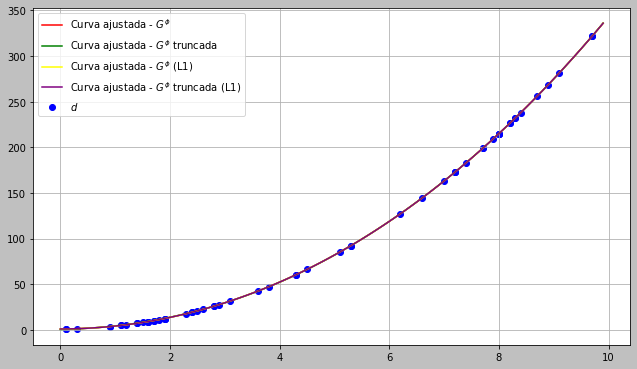

In [28]:
#26) Curvas dos modelos obtidos aplicados ao conjunto de dados d
PlotCurveFits(trab1_df,d_all,d_hat_pinv,d_hat_pinv_trunc,d_hat_pinv_l1,d_hat_pinv_trunc_l1,0)

()

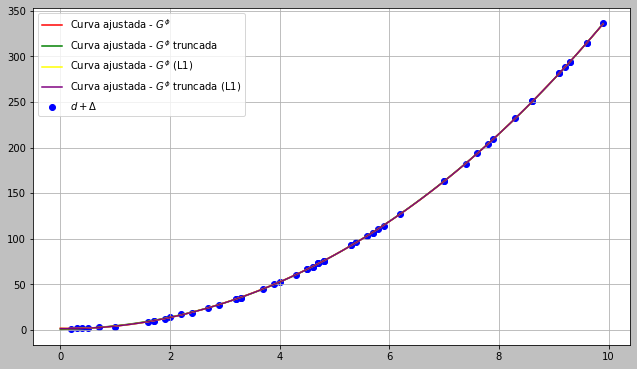

In [29]:
#27) Curvas dos modelos obtidos aplicados ao conjunto de dados d + delta
PlotCurveFits(trab1_df,d_all,d_hat_pinv,d_hat_pinv_trunc,d_hat_pinv_l1,d_hat_pinv_trunc_l1,1)

()

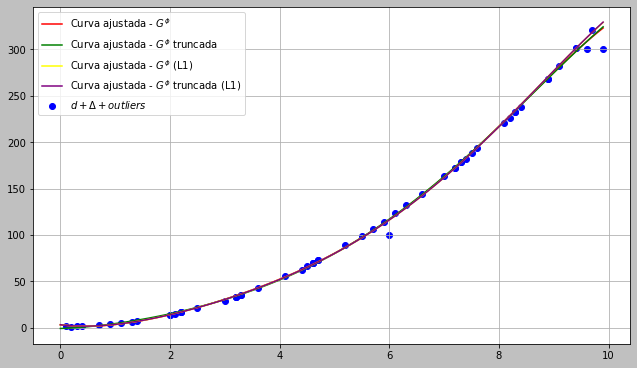

In [30]:
#28) Curvas dos modelos obtidos aplicados ao conjunto de dados d + delta + outliers
PlotCurveFits(trab1_df,d_all,d_hat_pinv,d_hat_pinv_trunc,d_hat_pinv_l1,d_hat_pinv_trunc_l1,2)

### Conclusão 
Foi possível verificar que quando o problema é de posto completo a solução pelo uso da pseudoinversa $\mathbf{G}^{\phi}$ resultante da SVD de $\mathbf{G}$ é de fato uma solução de mínimos quadrados (mostrado em #16 e #20). Além disso, o truncamento do menor valor singular de $\mathbf{G}$ mostrou ter um pequeno efeito regularizador sobre a solução obtida com $\mathbf{G}^{\phi}$ (mostrado em #28), reduzindo o efeito do sobreajuste de um polinômio de 5° grau aos dados gerados por um modelo real polinomial de 3° grau.

#### Referências

Aster, R., Borchers, B., Thurber, C., Parameter Estimation and Inverse Problems, Third Edition, Elsevier Academic Press, 404 pp., 2018. 

In [ ]:
####################################################################################################################